In [1]:
import numpy
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader

In [2]:
dataset = datasets.MNIST('.', download=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 7427877.79it/s] 


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28883093.42it/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 8420110.45it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4541246.43it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



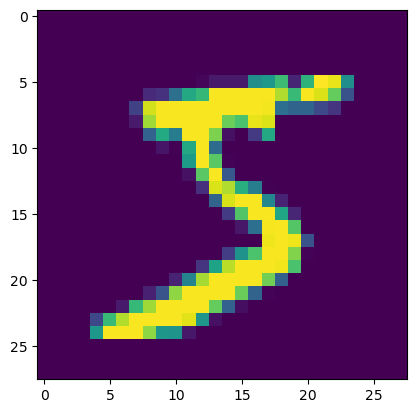

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(dataset.data[0].detach().numpy())
plt.show()

## Задача 1. Обучить полносвязную модель на MNIST

### Реализуем модель в стандартном виде, в котором она была представлена в лекции

In [5]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.1):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, output_dim)

        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.do1(self.activation(self.linear1(x)))
        x = self.do2(self.activation(self.linear2(x)))

        return self.linear3(x)

In [6]:
def collate_fn(data: list):
    pics = []
    target = []
    for item in data:
        pics.append(numpy.array(item[0]))
        target.append(item[1])
    pics = torch.from_numpy(numpy.array(pics)).float() / 255 # B x W x H
    target = torch.from_numpy(numpy.array(target))

    return {
        'data': pics.view(pics.size(0), -1),
        'target': target,}

In [7]:
# hyperparams
inp_dim = 28 * 28
hidden = 256
out_dim = 10
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 10
batch_size = 128

In [11]:
model = LinearModel(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

In [12]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device).long())
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
        torch.save(model.state_dict(), f'./chkpt_{epoch}.pth')

epoch: 0, step: 0, loss: 2.305626153945923
epoch: 0, step: 200, loss: 0.348014771938324
epoch: 0, step: 400, loss: 0.1633419394493103
epoch: 1, step: 0, loss: 0.2061845362186432
epoch: 1, step: 200, loss: 0.1847580373287201
epoch: 1, step: 400, loss: 0.1580585390329361
epoch: 2, step: 0, loss: 0.09520301967859268
epoch: 2, step: 200, loss: 0.06977543979883194
epoch: 2, step: 400, loss: 0.02403486892580986
epoch: 3, step: 0, loss: 0.05281877517700195
epoch: 3, step: 200, loss: 0.023784678429365158
epoch: 3, step: 400, loss: 0.08850326389074326
epoch: 4, step: 0, loss: 0.04691809415817261
epoch: 4, step: 200, loss: 0.030766045674681664
epoch: 4, step: 400, loss: 0.061828285455703735
epoch: 5, step: 0, loss: 0.024476803839206696
epoch: 5, step: 200, loss: 0.07682830095291138
epoch: 5, step: 400, loss: 0.07606303691864014
epoch: 6, step: 0, loss: 0.014368685893714428
epoch: 6, step: 200, loss: 0.04329071566462517
epoch: 6, step: 400, loss: 0.0518050417304039
epoch: 7, step: 0, loss: 0.0165

### Попробуем применить Сигмоиду

In [14]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.1):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, output_dim)

        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.do1(self.activation(self.linear1(x)))
        x = self.do2(self.activation(self.linear2(x)))

        return self.linear3(x)

In [15]:
model = LinearModel(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

In [16]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device).long())
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
        torch.save(model.state_dict(), f'./chkpt_{epoch}.pth')

epoch: 0, step: 0, loss: 2.329514503479004
epoch: 0, step: 200, loss: 0.43864870071411133
epoch: 0, step: 400, loss: 0.26574480533599854
epoch: 1, step: 0, loss: 0.2520867586135864
epoch: 1, step: 200, loss: 0.26213762164115906
epoch: 1, step: 400, loss: 0.12980355322360992
epoch: 2, step: 0, loss: 0.198484867811203
epoch: 2, step: 200, loss: 0.30414462089538574
epoch: 2, step: 400, loss: 0.18149374425411224
epoch: 3, step: 0, loss: 0.1180005595088005
epoch: 3, step: 200, loss: 0.19922061264514923
epoch: 3, step: 400, loss: 0.08821189403533936
epoch: 4, step: 0, loss: 0.09459053725004196
epoch: 4, step: 200, loss: 0.11067195981740952
epoch: 4, step: 400, loss: 0.07571357488632202
epoch: 5, step: 0, loss: 0.11167462915182114
epoch: 5, step: 200, loss: 0.1123131513595581
epoch: 5, step: 400, loss: 0.15625999867916107
epoch: 6, step: 0, loss: 0.0767073929309845
epoch: 6, step: 200, loss: 0.20082297921180725
epoch: 6, step: 400, loss: 0.09358647465705872
epoch: 7, step: 0, loss: 0.08907385

In [ ]:
# сигмоида отработала хуже

### Добавим слой

In [18]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.1):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        self.linear4 = nn.Linear(hidden_dim, output_dim)

        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.do3 = nn.Dropout(dropout_p)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.do1(self.activation(self.linear1(x)))
        x = self.do2(self.activation(self.linear2(x)))
        x = self.do3(self.activation(self.linear3(x)))

        return self.linear4(x)

In [19]:
model = LinearModel(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

In [20]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device).long())
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
        torch.save(model.state_dict(), f'./chkpt_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3118743896484375
epoch: 0, step: 200, loss: 0.2612638473510742
epoch: 0, step: 400, loss: 0.15483027696609497
epoch: 1, step: 0, loss: 0.14875347912311554
epoch: 1, step: 200, loss: 0.06868734210729599
epoch: 1, step: 400, loss: 0.13277553021907806
epoch: 2, step: 0, loss: 0.14985966682434082
epoch: 2, step: 200, loss: 0.05571310967206955
epoch: 2, step: 400, loss: 0.02602122537791729
epoch: 3, step: 0, loss: 0.025548867881298065
epoch: 3, step: 200, loss: 0.09426605701446533
epoch: 3, step: 400, loss: 0.03576326742768288
epoch: 4, step: 0, loss: 0.012749879620969296
epoch: 4, step: 200, loss: 0.06389794498682022
epoch: 4, step: 400, loss: 0.07100056856870651
epoch: 5, step: 0, loss: 0.037895962595939636
epoch: 5, step: 200, loss: 0.04375274479389191
epoch: 5, step: 400, loss: 0.014639684930443764
epoch: 6, step: 0, loss: 0.0786169171333313
epoch: 6, step: 200, loss: 0.02240810915827751
epoch: 6, step: 400, loss: 0.07619648426771164
epoch: 7, step: 0, loss: 0

In [ ]:
# Результат получше, чем в лекции

### Попробуем между слоями применить разные активации

In [21]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.1):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        self.linear4 = nn.Linear(hidden_dim, output_dim)

        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.do3 = nn.Dropout(dropout_p)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()

    def forward(self, x):
        x = self.do1(self.activation1(self.linear1(x)))
        x = self.do2(self.activation2(self.linear2(x)))
        x = self.do3(self.activation1(self.linear3(x)))

        return self.linear4(x)

In [22]:
model = LinearModel(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

In [23]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device).long())
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
        torch.save(model.state_dict(), f'./chkpt_{epoch}.pth')

epoch: 0, step: 0, loss: 2.297086238861084
epoch: 0, step: 200, loss: 0.31946372985839844
epoch: 0, step: 400, loss: 0.2344718724489212
epoch: 1, step: 0, loss: 0.2560077905654907
epoch: 1, step: 200, loss: 0.1164950504899025
epoch: 1, step: 400, loss: 0.134099081158638
epoch: 2, step: 0, loss: 0.055020302534103394
epoch: 2, step: 200, loss: 0.13470521569252014
epoch: 2, step: 400, loss: 0.08118443191051483
epoch: 3, step: 0, loss: 0.08790833503007889
epoch: 3, step: 200, loss: 0.10459334403276443
epoch: 3, step: 400, loss: 0.15526628494262695
epoch: 4, step: 0, loss: 0.046109702438116074
epoch: 4, step: 200, loss: 0.05787033587694168
epoch: 4, step: 400, loss: 0.058076608926057816
epoch: 5, step: 0, loss: 0.05488448962569237
epoch: 5, step: 200, loss: 0.0370866023004055
epoch: 5, step: 400, loss: 0.03335827589035034
epoch: 6, step: 0, loss: 0.06112835928797722
epoch: 6, step: 200, loss: 0.017222633585333824
epoch: 6, step: 400, loss: 0.020178690552711487
epoch: 7, step: 0, loss: 0.013

In [ ]:
# Неоднозначный результат, на первых эпохах результат заметно хуже, однако в конце loss заметно ниже

## Задача 2. Обучить глубокую сверточную сеть на MNIST

### Реализуем модель в стандартном виде, в котором она была представлена в лекции

In [24]:
class ConvModel(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_ch, hidden_ch, 
                               kernel_size=5, padding=2, stride=2) # уменьшаем картинку в 2 раза
        self.bn1 = nn.BatchNorm2d(hidden_ch)
        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(hidden_ch)
        self.conv3 = nn.Conv2d(hidden_ch, 2, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(2)
        self.linear3 = nn.Linear(2 * 14 * 14, output_dim)
        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.do1(self.activation(self.bn1(self.conv1(x))))
        x = self.do2(self.activation(self.bn2(self.conv2(x))))
        x = self.activation(self.bn3(self.conv3(x))) # B x 2 x 14 x 14
        
        return self.linear3(x.view(x.size(0), -1))

In [25]:
# hyperparams
input_ch = 1
hidden_ch = 128
out_dim = 10
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 10
batch_size = 128

In [29]:
def collate_fn_conv(data: list):
    pics = []
    target = []
    for item in data:
        pics.append(numpy.array(item[0])) # W x H
        target.append(item[1])
    pics = torch.from_numpy(numpy.array(pics)).float() / 255 # B x W x H
    target = torch.from_numpy(numpy.array(target))
        
    return {
        'data': pics.unsqueeze(1), # B x 1(C) x W x H
        'target': target.long(),
        }

In [27]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [30]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn_conv,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model_conv(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_conv.state_dict(), f'./chkpt_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.38936448097229
epoch: 0, step: 200, loss: 0.20370446145534515
epoch: 0, step: 400, loss: 0.16710509359836578
epoch: 1, step: 0, loss: 0.19182851910591125
epoch: 1, step: 200, loss: 0.04412289336323738
epoch: 1, step: 400, loss: 0.06302698701620102
epoch: 2, step: 0, loss: 0.10270051658153534
epoch: 2, step: 200, loss: 0.08635444939136505
epoch: 2, step: 400, loss: 0.02407689206302166
epoch: 3, step: 0, loss: 0.03947454318404198
epoch: 3, step: 200, loss: 0.04801643639802933
epoch: 3, step: 400, loss: 0.04819931834936142
epoch: 4, step: 0, loss: 0.018404874950647354
epoch: 4, step: 200, loss: 0.061334628611803055
epoch: 4, step: 400, loss: 0.01633421890437603
epoch: 5, step: 0, loss: 0.013739900663495064
epoch: 5, step: 200, loss: 0.013064589351415634
epoch: 5, step: 400, loss: 0.00803206767886877
epoch: 6, step: 0, loss: 0.025635648518800735
epoch: 6, step: 200, loss: 0.007479890249669552
epoch: 6, step: 400, loss: 0.025852583348751068
epoch: 7, step: 0, loss

### Попробуем поменять активацию

In [57]:
class ConvModel(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_ch, hidden_ch, 
                               kernel_size=5, padding=2, stride=2) # уменьшаем картинку в 2 раза
        self.bn1 = nn.BatchNorm2d(hidden_ch)
        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(hidden_ch)
        self.conv3 = nn.Conv2d(hidden_ch, 2, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(2)
        self.linear3 = nn.Linear(2 * 14 * 14, output_dim)
        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.do1(self.activation(self.bn1(self.conv1(x))))
        x = self.do2(self.activation(self.bn2(self.conv2(x))))
        x = self.activation(self.bn3(self.conv3(x))) # B x 2 x 14 x 14
        
        return self.linear3(x.view(x.size(0), -1))

In [58]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [59]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn_conv,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model_conv(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_conv.state_dict(), f'./chkpt_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.355731725692749
epoch: 0, step: 200, loss: 0.6383442282676697
epoch: 0, step: 400, loss: 0.38057294487953186
epoch: 1, step: 0, loss: 0.3475794494152069
epoch: 1, step: 200, loss: 0.1900980919599533
epoch: 1, step: 400, loss: 0.21323086321353912
epoch: 2, step: 0, loss: 0.16460172832012177
epoch: 2, step: 200, loss: 0.1686076670885086
epoch: 2, step: 400, loss: 0.06156535446643829
epoch: 3, step: 0, loss: 0.11585879325866699
epoch: 3, step: 200, loss: 0.10740355402231216
epoch: 3, step: 400, loss: 0.12296571582555771
epoch: 4, step: 0, loss: 0.14023280143737793
epoch: 4, step: 200, loss: 0.09796636551618576
epoch: 4, step: 400, loss: 0.15493854880332947


In [ ]:
# Снова сигмоида хуже отработала

## Добавим слой

In [74]:
class ConvModel(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_ch, hidden_ch, 
                               kernel_size=5, padding=2, stride=2) # уменьшаем картинку в 2 раза
        self.bn1 = nn.BatchNorm2d(hidden_ch)
        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(hidden_ch)
        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, 2, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(2)
        
        self.linear3 = nn.Linear(2 * 14 * 14, output_dim)
        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.do3 = nn.Dropout(dropout_p)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.do1(self.activation(self.bn1(self.conv1(x))))
        x = self.do2(self.activation(self.bn2(self.conv2(x))))
        x = self.do3(self.activation(self.bn3(self.conv3(x))))
        x = self.activation(self.bn4(self.conv4(x))) # B x 2 x 14 x 14
        
        return self.linear3(x.view(x.size(0), -1))

In [75]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [76]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn_conv,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model_conv(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_conv.state_dict(), f'./chkpt_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.333627462387085
epoch: 0, step: 200, loss: 0.0845581665635109
epoch: 0, step: 400, loss: 0.06749556213617325
epoch: 1, step: 0, loss: 0.09035209566354752
epoch: 1, step: 200, loss: 0.03046363964676857
epoch: 1, step: 400, loss: 0.07565552741289139
epoch: 2, step: 0, loss: 0.08403101563453674
epoch: 2, step: 200, loss: 0.006629061885178089
epoch: 2, step: 400, loss: 0.07137312740087509
epoch: 3, step: 0, loss: 0.01628328301012516
epoch: 3, step: 200, loss: 0.03826184570789337
epoch: 3, step: 400, loss: 0.02981729619204998
epoch: 4, step: 0, loss: 0.004089582245796919
epoch: 4, step: 200, loss: 0.12291419506072998
epoch: 4, step: 400, loss: 0.03017604537308216


In [ ]:
# результат стал несколько лучше, однако время исполнения сильно возросло

### Ну и в конце попробуем применить разные активации

In [77]:
class ConvModel(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_ch, hidden_ch, 
                               kernel_size=5, padding=2, stride=2) # уменьшаем картинку в 2 раза
        self.bn1 = nn.BatchNorm2d(hidden_ch)
        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(hidden_ch)
        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, 2, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(2)
        
        self.linear3 = nn.Linear(2 * 14 * 14, output_dim)
        self.do1 = nn.Dropout(dropout_p)
        self.do2 = nn.Dropout(dropout_p)
        self.do3 = nn.Dropout(dropout_p)
        
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()

    def forward(self, x):
        x = self.do1(self.activation1(self.bn1(self.conv1(x))))
        x = self.do2(self.activation2(self.bn2(self.conv2(x))))
        x = self.do3(self.activation1(self.bn3(self.conv3(x))))
        x = self.activation2(self.bn4(self.conv4(x))) # B x 2 x 14 x 14
        
        return self.linear3(x.view(x.size(0), -1))

In [78]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn_conv,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model_conv(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_conv.state_dict(), f'./chkpt_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3511531352996826
epoch: 0, step: 200, loss: 0.27509719133377075
epoch: 0, step: 400, loss: 0.1266573667526245
epoch: 1, step: 0, loss: 0.05639024078845978
epoch: 1, step: 200, loss: 0.06566277891397476
epoch: 1, step: 400, loss: 0.06121411547064781
epoch: 2, step: 0, loss: 0.09947463124990463


In [ ]:
# вроде существенных изменений по сравнению с прошлым шагом не наблюдается